In [1]:
import numpy as np
import pandas as pd

In [2]:
heart_failure = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
#randomize rows
heart_failure = heart_failure.sample(frac=1).reset_index(drop=True)
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,50.000,0,582,1,38,0,310000.00,1.9,135,1,1,35,1
1,80.000,0,898,0,25,0,149000.00,1.1,144,1,1,87,0
2,58.000,0,144,1,38,1,327000.00,0.7,142,0,0,83,0
3,95.000,1,371,0,30,0,461000.00,2.0,132,1,0,50,1
4,51.000,1,582,1,35,0,263358.03,1.5,136,1,1,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,58.000,1,145,0,25,0,219000.00,1.2,137,1,1,170,1
295,70.000,0,232,0,30,0,173000.00,1.2,132,1,0,210,0
296,70.000,1,69,1,50,1,351000.00,1.0,134,0,0,44,1
297,61.000,0,582,1,38,0,147000.00,1.2,141,1,0,237,0


In [4]:
X = heart_failure.loc[:, heart_failure.columns != 'DEATH_EVENT']
y = heart_failure['DEATH_EVENT']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
#import the k nearest neighbors classifiers
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
k_range = range(1, 20)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

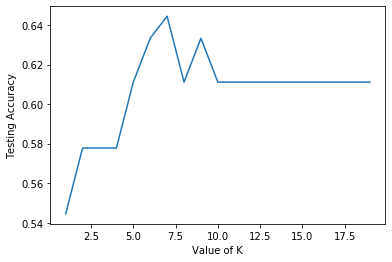

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

It looks like k values around 7 give the highest accuracy. 

In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=7)